In [48]:
import matplotlib.pyplot as plt  
import numpy as np

In [69]:
import re

def extract_data(filename, verbose=False):
    train_n = 0
    dev_n = 0
    loss_x = []  
    loss_y = []  
    train_x = []  
    train_y = []
    dev_x = []
    dev_y = []
    with open(f"{filename}") as f: #uniter_50feats_train
        train_n = 0
        dev_n = 0
        for line in f:  
            line = line.strip()
            if verbose==True:
                print(line)
            if "Train" in line: 
                res = re.search(r'RA ', line)
                start_pos = res.start()+3
                end_pos = res.end()+7
                if verbose==True:
                    print(float(line[start_pos:end_pos]))
                train_y.append(float(line[start_pos:end_pos]))
                train_x.append(train_n) 
                train_n += 250
                
            if "DEV" in line: 
                res = re.search(r'RA ', line)
                start_pos = res.start()+3
                end_pos = res.end()+7
                if verbose==True:
                    print(float(line[start_pos:end_pos]))
                dev_y.append(float(line[start_pos:end_pos]))
    print(len(train_x), len(train_y), len(dev_y))
    return train_x, train_y, dev_y


In [54]:
extract_data('uniter_50feats_train')


Epoch(U) 0(250): Train AC 59.30 RA 52.8669 LOSS 1395.8777
52.8669

Epoch(U) 0(250): DEV AC 52.20 RA 48.0901
48.0901
Epoch(U) 0(250): BEST AC 52.20 RA 48.0901

Epoch(U) 0(500): Train AC 62.45 RA 59.1762 LOSS 1258.3975
59.1762

Epoch(U) 0(500): DEV AC 59.00 RA 67.8546
67.8546
Epoch(U) 0(500): BEST AC 59.00 RA 67.8546

Epoch(U) 0(750): Train AC 66.18 RA 66.6263 LOSS 1098.0169
66.6263

Epoch(U) 0(750): DEV AC 59.60 RA 72.8377
72.8377
Epoch(U) 0(750): BEST AC 59.60 RA 72.8377

Epoch(U) 0(1000): Train AC 68.75 RA 70.7974 LOSS 1025.5716
70.7974

Epoch(U) 0(1000): DEV AC 66.20 RA 73.0553
73.0553
Epoch(U) 0(1000): BEST AC 66.20 RA 73.0553

Epoch(U) 1(1250): Train AC 85.50 RA 91.0756 LOSS 861.1668
91.0756

Epoch(U) 1(1250): DEV AC 67.80 RA 75.5085
75.5085
Epoch(U) 1(1250): BEST AC 67.80 RA 75.5085

Epoch(U) 1(1500): Train AC 84.44 RA 90.5767 LOSS 820.0621
90.5767

Epoch(U) 1(1500): DEV AC 67.20 RA 74.9724
74.9724
Epoch(U) 1(1500): BEST AC 67.80 RA 75.5085

Epoch(U) 1(1750): Train AC 84.81 RA 90

1 Epoch has 1000 iterations

In [63]:
def plot(train_x, train_y, dev_y, figname, title):
    
    fig = plt.figure(figsize=(8,6))  
    plt.plot(train_x,dev_y,'',label="Val AUC")  
    plt.plot(train_x,train_y,'',label="Train AUC") 
    plt.title(title)   #'AUROC for Uniter + BERT-Large-Cased + 50 Features'
    plt.legend(loc='lower right')  
    plt.xlabel('Iteration')  
    plt.ylabel('')  
    plt.grid(acc_x)  
    plt.show()  
    fig.savefig(f'{figname}.png')

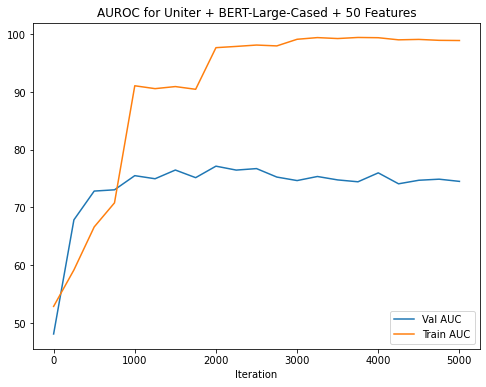

In [51]:
plot(train_x, train_y, dev_y, 'uniter50_bert_cased')

21 21 21


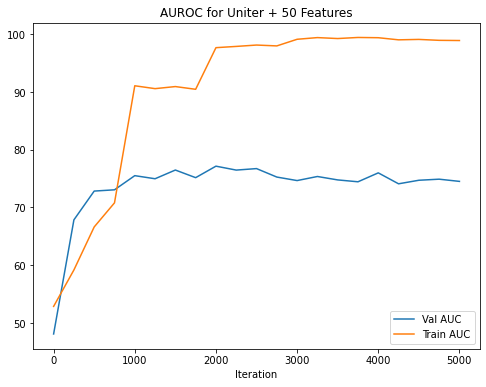

In [71]:
# Uniter 50 feats Train
train_x, train_y, dev_y = extract_data('uniter_50feats_train.log')
title = 'AUROC for Uniter + 50 Features'
fig_name = 'uniter_50feats'
plot(train_x, train_y, dev_y, fig_name, title)

21 21 21


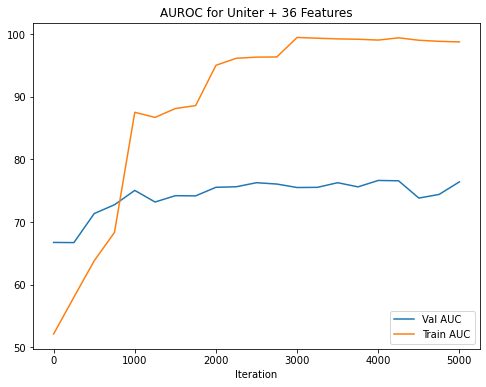

In [73]:
# Uniter 36 feats Train
train_x, train_y, dev_y = extract_data('uniter_36feats_train.log')
title = 'AUROC for Uniter + 36 Features'
fig_name = 'uniter_36feats'
plot(train_x, train_y, dev_y, fig_name, title)

22 22 22


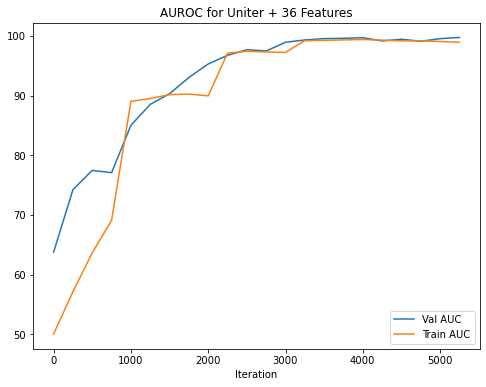

In [77]:
# Uniter 36 feats Train Dev
train_x, train_y, dev_y = extract_data('uniter_36feats_traindev.log')
title = 'AUROC for Uniter + 36 Features'
fig_name = 'uniter_36feats'
plot(train_x, train_y, dev_y, fig_name, title)

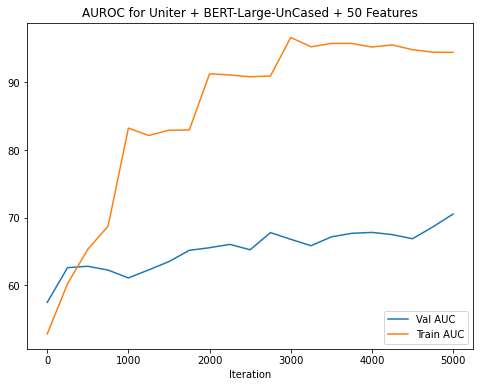

In [65]:
# BERT Uncased
train_x, train_y, dev_y = extract_data('bert_uncased_log.log')
title = 'AUROC for Uniter + BERT-Large-UnCased + 50 Features'
plot(train_x, train_y, dev_y, 'uniter50_bert_uncased', title)

21 21 21


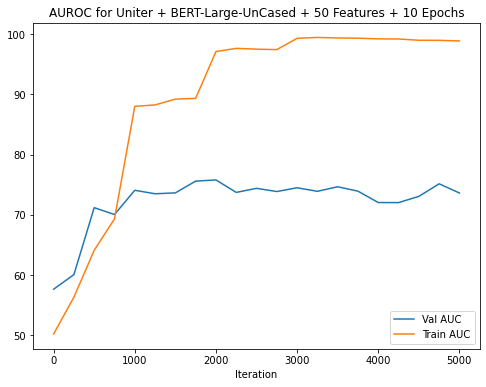

In [75]:
train_x, train_y, dev_y = extract_data('uniter_72feats_train.log')
title = 'AUROC for Uniter + BERT-Large-UnCased + 50 Features + 10 Epochs'
plot(train_x, train_y, dev_y, 'uniter72', title)

21 21 21


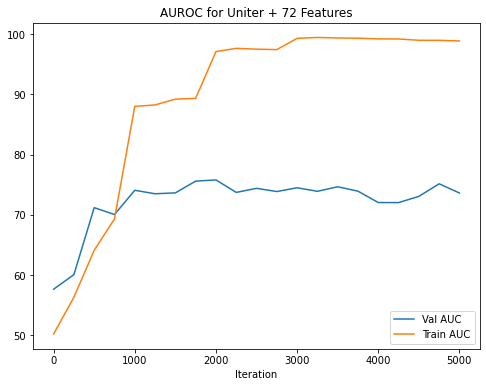

In [79]:
train_x, train_y, dev_y = extract_data('uniter_72feats_train.log')
title = 'AUROC for Uniter + 72 Features'
plot(train_x, train_y, dev_y, 'uniter72_bert', title)

## Ben's Original Code

In [ ]:
#         if len(line.split("Train RA ")) == 2:  
#             acc_y.append(float(line.split("RA ")[1]))
#             acc_x.append(a_n)  
#             a_n += 250    
#         if len(line.split("LOSS ")) == 2:  
#             loss_y.append(float(line.split("LOSS ")[1]))  
#             loss_x.append(l_n)  
#             l_n += 250
#         if len(line.split("DEV RA ")) == 2:  
#             dev_y.append(float(line.split("DEV RA ")[1]))
#             dev_x.append(a_n)  
#             d_n += 250

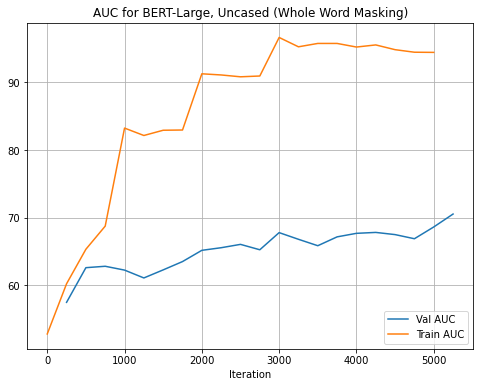

In [98]:
fig = plt.figure(figsize=(8,6))  
plt.plot(dev_x,dev_y,'',label="Val AUC")  
plt.plot(acc_x,acc_y,'',label="Train AUC")  
plt.title('AUC for BERT-Large, Uncased (Whole Word Masking)')  
plt.legend(loc='lower right')  
plt.xlabel('Iteration')  
plt.ylabel('')  
plt.grid(acc_x)  
plt.show()  
fig.savefig('/Users/bw1552/Downloads/Bert_large_AUC.png')

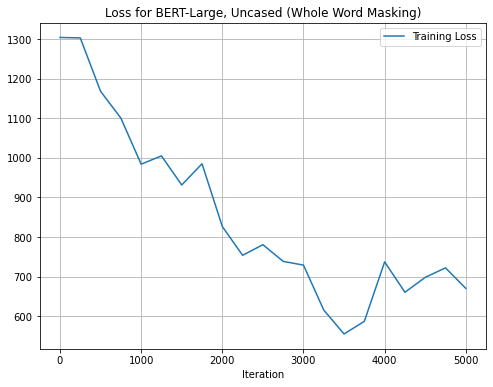

In [99]:
fig = plt.figure(figsize=(8,6))  
plt.plot(loss_x,loss_y,'',label="Training Loss")  
plt.title('Loss for BERT-Large, Uncased (Whole Word Masking)')  
plt.legend(loc='upper right')  
plt.xlabel('Iteration')  
plt.ylabel('')  
plt.grid(loss_x)  
plt.show()
fig.savefig('/Users/bw1552/Downloads/Bert_large_Loss.png')